<h1 align="center">Vivid Data Analyst Assignment</h1>

<h2 align="center">Contact Center Analytics</h2>

The task is to analyse chat conversations from the raw data provided. Some KPIs among others we will be looking to analysze include:
* First Response Time (FRT)
* First Contact Resolution (FCR)
* Average Handle Time (AHT)
* Chat Volume Trend
* Chat Ratings
* Chat Resolution Time
* Monthly customer segments and their contact behaviour

### Workflow

* Import necessary libraries
* Load the data
* Exploratory Data Analysis (including summary statistics, visualization,answer some business questions, etc)
* Data Preprocessing/Feature engineering (Missing Data, Outliers, etc.)

### Import necessary libraries

In [1]:
from pyforest import *
lazy_imports()
import sqldf
import plotly.offline as pyoff
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)
import warnings
warnings.filterwarnings('ignore')

<h2 align="center">Exploratory data analysis</h2>

### Import the dataset into pandas:

There are 2 data sheets or datasets,i.e. **Conversations & Customers Monthly** which is in an excel file Assignment.xlsx, so we are going to import the dataset into pandas.

In [2]:
#import the dataset into pandas: 
data = pd.ExcelFile('Assignment.xlsx', engine = 'openpyxl')

<IPython.core.display.Javascript object>

<h3 align="left">Customers Monthly dataset</h3>

In [3]:
#Customers Monthly dataset
df_cust = pd.read_excel(data, 'Customers Monthly')
df_cust = df_cust[df_cust['CUSTOMER_HK'].notna()]

<IPython.core.display.Javascript object>

### Summary Statistics

In [4]:
# Understand the data by getting some information, as well as some descriptive statistics
def load_data(df_cust):
    print('\033[1m' + '\033[94m' + 'List of Columns:'.center(80)+ '\033[0m')
    print(df_cust.columns.values)
    print('\n')

    print('\033[1m' + '\033[94m' + 'Shape of DataFrame:'.center(80)+ '\033[0m')
    print('The dataset has', df_cust.shape[0], 'rows and', df_cust.shape[1], 'columns.')
    print('\n')

    print('\033[1m' + '\033[94m' + 'Table Schema and Data Types:'.center(80)+ '\033[0m')
    print(df_cust.info())
    print('\n')

    print('\033[1m' + '\033[94m' + 'Descriptive Statistics:'.center(80)+ '\033[0m')
    print(df_cust.describe())
    return df_cust.head(2)

In [5]:
load_data(df_cust)

                                List of Columns:                                
['CUSTOMER_HK' 'DAY_DT' 'BANK_IS_ACTIVE' 'INVEST_IS_ACTIVE' 'PLAN_NM']


                              Shape of DataFrame:                               
The dataset has 39535 rows and 5 columns.


                          Table Schema and Data Types:                          
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39535 entries, 0 to 39534
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CUSTOMER_HK       39535 non-null  object        
 1   DAY_DT            39535 non-null  datetime64[ns]
 2   BANK_IS_ACTIVE    39535 non-null  float64       
 3   INVEST_IS_ACTIVE  39535 non-null  float64       
 4   PLAN_NM           38362 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 1.8+ MB
None


                            Descriptive Statistics:                         

,CUSTOMER_HK,DAY_DT,BANK_IS_ACTIVE,INVEST_IS_ACTIVE,PLAN_NM
0,04c604e678b18d7ca10b85fb8d3672a03b7b6b71e78dd5...,2020-11-30,1.0,0.0,prime
1,a42a9fdf0ee31d331c9d96ce6fbf30f307b52ff40a55ec...,2021-01-31,1.0,0.0,prime


In [6]:
# Lets check the summary statistics of the variables 
df_cust.describe(include='all')

,CUSTOMER_HK,DAY_DT,BANK_IS_ACTIVE,INVEST_IS_ACTIVE,PLAN_NM
count,39535,39535,39535.000000,39535.000000,38362
unique,19717,3,NaN,NaN,3
top,238fe4ef9aa063a4ffe2424a20ead5ab9d269cf43ac328...,2021-01-31 00:00:00,NaN,NaN,prime
freq,69,18008,NaN,NaN,32849
first,NaN,2020-11-30 00:00:00,NaN,NaN,NaN
last,NaN,2021-01-31 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,0.608094,0.006020,NaN
std,NaN,NaN,0.488182,0.077356,NaN
min,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,0.000000,0.000000,NaN


In [7]:
# Handling Missing Values
num_missing = df_cust.isnull().sum()
missing_per = (num_missing/df_cust.shape[0])*100
missing_table = pd.concat([num_missing,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Num_Missing',1:'%_Missing'}, inplace=True)
print('\033[1m' + '\033[94m' + 'Missing Data Info:'.center(80) + '\033[0m')
print(missing_table)

<IPython.core.display.Javascript object>

                               Missing Data Info:                               
                  Num_Missing  %_Missing
CUSTOMER_HK                 0   0.000000
DAY_DT                      0   0.000000
BANK_IS_ACTIVE              0   0.000000
INVEST_IS_ACTIVE            0   0.000000
PLAN_NM                  1173   2.966991


**Unique number of features**

In [8]:
#Unique number of features

#df_cust.nunique().plot(kind='bar', color = list('rgbkymc'), title='unique number of the features')
df_cust.nunique()

CUSTOMER_HK         19717
DAY_DT                  3
BANK_IS_ACTIVE          2
INVEST_IS_ACTIVE        2
PLAN_NM                 3
dtype: int64

<h3 align="center">Observations from Customers Monthly dataset</h3>

From above, there are 39535 rows and 5 columns in the df_conv, i.e. Customers Monthly dataset, with only PLAN_NM column having 1173 missing values. These are the column variable definitions:
* **CUSTOMER_HK:** Key for customers. There are 19717 unique customer keys with no missing values.
* **DAY_DT:** Last day of the month. There are 3 unique dates (2020-11-30 ,2020-12-31 & 2021-01-31, with the later being the top date) with no missing values. 
* **BANK_IS_ACTIVE:** Whether the customer is active in banking, i.e. has money in account or made transfers in last 30 days. No missing values.
* **INVEST_IS_ACTIVE:** Whether the customer is active in invest, i.e. has money in portfolio or made investments in last 30 days. No missing values.
* **PLAN_NM:** What plan does the customer have. There are 3 unique plans (prime, standart & custom, with most customers on prime) with 1173 missing values.

We will have to deal with the missing values in both df_conv and df_conv, as well as check for possible duplicates and outliers or invalid values. Now lets look at some trends over time.

<h3 align="left">Conversations dataset</h3>

In [9]:
#For Conversations dataset

df_conv = pd.read_excel(data, 'Conversations')
df_conv = df_conv[df_conv['CUSTOMER_HK'].notna()] #remove rows with missing values in CUSTOMER_HK

<IPython.core.display.Javascript object>

In [10]:
df_conv

,CONVERSATION_HK,CREATED_AT,STATUS_CD,CLOSED_AT,RATING_NUM,LANGUAGE_CD,FRT_DU_IN_MIN,INITIATOR_CD,CUSTOMER_HK
0,0008a84b8d7f6bf55740053ca635b11722bfe4f38a9ffa...,2020-11-16 17:18:40,closed,2020-11-16 18:41:31,NaN,de,82.816667,Customer,04c604e678b18d7ca10b85fb8d3672a03b7b6b71e78dd5...
1,000ad81c0e996b624c296cb105b11c5f76777fae456ecb...,2020-12-08 09:13:49,closed,2020-12-13 09:04:20,NaN,de,5759.333333,Customer,a42a9fdf0ee31d331c9d96ce6fbf30f307b52ff40a55ec...
2,000c2e8ad3fb870813d3ea8f7ea1094f7508d9fee1205f...,2020-12-28 14:09:31,closed,2020-12-28 15:58:05,NaN,fr,35.666667,Customer,be92b2698f17aa7fab796fd5eb132cc251fce6fe1870dc...
3,000cc854daaeff5b59deaae9f11c18c0d59beda58b7249...,2021-01-08 08:49:28,closed,2021-01-13 08:09:37,NaN,de,653.800000,Customer,c84455bb3bbc2dbf16a1edd9c44e76baaf06b0ee224ed5...
4,000db3ed6e7c9a1ab900a61fa02f2fc6d75fb65670d6b0...,2020-12-03 22:15:15,closed,2020-12-05 01:58:26,NaN,en,843.033333,Customer,7df3aa4e5f29e4f5946d652d4f6d6f88d3f850ac9ba33a...
...,...,...,...,...,...,...,...,...,...
40310,fffa6fcad633f39649228bdd99b6f1fc2365067e6fd0d6...,2021-01-04 15:56:03,closed,2021-01-04 20:17:36,NaN,en,260.566667,Customer,4c65aeb4e3c56d9ad692a2dd53f6e58d3b1c03f53ebee8...
40311,fffb4d2846b9fed3be3d6b6ac195057e57bf34a3650d4b...,2020-12-23 13:32:14,closed,2020-12-23 15:19:54,4.0,fr,27.033333,Customer,b3c4de44a98d55acc296d54636f321323e55bc793f0c01...
40312,fffcd914a96f3b7d2468cdd704d3857cc12ebfb12baf9b...,2020-11-20 18:24:26,closed,2020-11-23 10:38:23,NaN,en,1772.050000,Customer,ed1cd862b1e0c82f9c96b6a895c6122fbfcac469801701...
40313,fffda5c392e3c25ff2eac6ff3a1f6c8cd0838278490eaa...,2020-12-07 05:41:18,closed,2020-12-07 06:07:21,NaN,en,2.933333,Customer,68b47f0f4243f0fccc0e21bc72b750f76387838e20aa82...


### Summary Statistics

In [11]:
# Understand the data by getting some information, as well as some descriptive statistics
def load_data(df_conv):
    print('\033[1m' + '\033[94m' + 'List of Columns:'.center(80)+ '\033[0m')
    print(df_conv.columns.values)
    print('\n')

    print('\033[1m' + '\033[94m' + 'Shape of DataFrame:'.center(80)+ '\033[0m')
    print('The dataset has', df_conv.shape[0], 'rows and', df_conv.shape[1], 'columns.')
    print('\n')

    print('\033[1m' + '\033[94m' + 'Table Schema and Data Types:'.center(80)+ '\033[0m')
    print(df_conv.info())
    print('\n')

    print('\033[1m' + '\033[94m' + 'Descriptive Statistics:'.center(80)+ '\033[0m')
    print(df_conv.describe())
    return df_conv.head(2)

In [12]:
load_data(df_conv)

                                List of Columns:                                
['CONVERSATION_HK' 'CREATED_AT' 'STATUS_CD' 'CLOSED_AT' 'RATING_NUM'
 'LANGUAGE_CD' 'FRT_DU_IN_MIN' 'INITIATOR_CD' 'CUSTOMER_HK']


                              Shape of DataFrame:                               
The dataset has 40315 rows and 9 columns.


                          Table Schema and Data Types:                          
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40315 entries, 0 to 40314
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CONVERSATION_HK  40315 non-null  object        
 1   CREATED_AT       40315 non-null  datetime64[ns]
 2   STATUS_CD        40315 non-null  object        
 3   CLOSED_AT        39559 non-null  datetime64[ns]
 4   RATING_NUM       15085 non-null  float64       
 5   LANGUAGE_CD      40313 non-null  object        
 6   FRT_DU_IN_MIN    34051 non-null  float64    

,CONVERSATION_HK,CREATED_AT,STATUS_CD,CLOSED_AT,RATING_NUM,LANGUAGE_CD,FRT_DU_IN_MIN,INITIATOR_CD,CUSTOMER_HK
0,0008a84b8d7f6bf55740053ca635b11722bfe4f38a9ffa...,2020-11-16 17:18:40,closed,2020-11-16 18:41:31,NaN,de,82.816667,Customer,04c604e678b18d7ca10b85fb8d3672a03b7b6b71e78dd5...
1,000ad81c0e996b624c296cb105b11c5f76777fae456ecb...,2020-12-08 09:13:49,closed,2020-12-13 09:04:20,NaN,de,5759.333333,Customer,a42a9fdf0ee31d331c9d96ce6fbf30f307b52ff40a55ec...


In [13]:
# Lets check the summary statistics of the variables 
df_conv.describe(include='all')

,CONVERSATION_HK,CREATED_AT,STATUS_CD,CLOSED_AT,RATING_NUM,LANGUAGE_CD,FRT_DU_IN_MIN,INITIATOR_CD,CUSTOMER_HK
count,40315,40315,40315,39559,15085.000000,40313,34051.000000,40315,40315
unique,39535,39367,3,38650,NaN,5,NaN,2,19717
top,b2258ffcdff7a1942e3a2fe0b2f6370524be6821be94af...,2021-01-04 15:46:41,closed,2021-01-04 17:42:02,NaN,de,NaN,Customer,238fe4ef9aa063a4ffe2424a20ead5ab9d269cf43ac328...
freq,2,4,40303,3,NaN,15233,NaN,38071,70
first,NaN,2020-11-01 00:44:03,NaN,2020-11-01 01:21:50,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-01-31 23:51:57,NaN,2021-10-12 09:24:58,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.201724,NaN,838.680738,NaN,NaN
std,NaN,NaN,NaN,NaN,1.158345,NaN,3640.505013,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,0.183333,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.000000,NaN,9.333333,NaN,NaN


### Data Transfromation

In [14]:
# Handling Missing Values
num_missing = df_conv.isnull().sum()
missing_per = (num_missing/df_conv.shape[0])*100
missing_table = pd.concat([num_missing,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Num_Missing',1:'%_Missing'}, inplace=True)
print('\033[1m' + '\033[94m' + 'Missing Data Info:'.center(80) + '\033[0m')
print(missing_table)

<IPython.core.display.Javascript object>

                               Missing Data Info:                               
                 Num_Missing  %_Missing
CONVERSATION_HK            0   0.000000
CREATED_AT                 0   0.000000
STATUS_CD                  0   0.000000
CLOSED_AT                756   1.875233
RATING_NUM             25230  62.582165
LANGUAGE_CD                2   0.004961
FRT_DU_IN_MIN           6264  15.537641
INITIATOR_CD               0   0.000000
CUSTOMER_HK                0   0.000000


There are many ways to handle missing values:
* Filling them in manually if records available
* Generally, if a very small percentage of data is missing (e.g. <1%), then you might consider just filtering out or deleting the missing data from your analysis, in this case this will apply to the language_cd column. 
* If <15%, you may consider filling in your missing data with a typical value, such as the mean, median or the mode, to perform an accurate analysis, i.e. applicable to closed_at(1.9%) & FRT (15%) columns. 
* However, if > 15%, we may have to remove the column from the data analysis, as there would not be enough accurate data to make accurate conclusions based on the values in the column, i.e applicable to rating_num column (63%).
* For the purpose of this study, we will deal with the missing values, based on the question we want to answer, e.g, we don't need to drop all rows with NaNs in rating_num column if we want to estimate call volume trends.

**Unique number of features**

CONVERSATION_HK    39535
CREATED_AT         39367
STATUS_CD              3
CLOSED_AT          38650
RATING_NUM             5
LANGUAGE_CD            5
FRT_DU_IN_MIN      18301
INITIATOR_CD           2
CUSTOMER_HK        19717
dtype: int64


<AxesSubplot:title={'center':'unique number of the features'}>

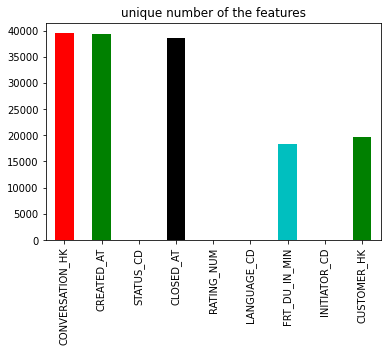

In [15]:
#Unique number of features
print(df_conv.nunique())
df_conv.nunique().plot(kind='bar', color = list('rgbkymc'), title='unique number of the features')

#### Conversation Key

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1    38755
2      780
Name: CONVERSATION_HK, dtype: int64


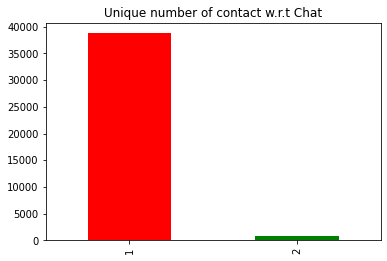

In [16]:
df_conv_key = pd.DataFrame(df_conv.CONVERSATION_HK.value_counts())
conv_freq = pd.value_counts(df_conv_key.CONVERSATION_HK)
conv_freq.plot(kind='bar', color = list('rgbkymc'), title='Unique number of contact w.r.t Chat')
print(conv_freq)

* **CONVERSATION_HK:** Key for each chat. There are 39535 unique conversation or chats keys, with ca. 98% resolved within first contact & only ca. 2% requiring 2nd contact.There are no missing values.

#### Customer Key

In [17]:
df_cust_key = pd.DataFrame(df_conv.CUSTOMER_HK.value_counts())
df_cust_key

<IPython.core.display.Javascript object>

,CUSTOMER_HK
238fe4ef9aa063a4ffe2424a20ead5ab9d269cf43ac328271caab3df9adf51ed,70
89496dfa44794a27339c3f8d606e7567e00cc2fdd62f94f4033296ff3ddaba68,64
fb41d08f7db65d62fae5bd73da46edef26b9e4cfd1df900e8f97e6d71aee93b0,36
6a934916393c48a86c4f0945b65ce8d89841f6484706d359cf3730edf4bd9abf,34
8a0cb38b11f8518cba622ed84fdccee5edb4049fd184903715458cd395a8547c,32
...,...
afde4866dd9d808c69898712326597ce5dd3d5ce0fce020250a8356cedaa9910,1
19b6d655d6d8c5a7a6475c97d1ea2f8b196f864938f9ab5ee3e868be4acbea27,1
91036d60fd71a7fd2b4844d25d4fbf4ab4bdcfa3b08812c970dcebcddfc43c2c,1
173dd28ad507aa98e86386d382faa969ff101a50c8e1c31266f44e5631bd11d6,1


#### Chat Status 

In [18]:
df_status = pd.DataFrame(df_conv.STATUS_CD.value_counts())
df_status

<IPython.core.display.Javascript object>

,STATUS_CD
closed,40303
snoozed,11
open,1


#### Chat Languages

In [19]:
df_lang = pd.DataFrame(df_conv.LANGUAGE_CD.value_counts())
df_lang

<IPython.core.display.Javascript object>

,LANGUAGE_CD
de,15233
en,13522
fr,8843
es,2508
it,207


<AxesSubplot:title={'center':'Chat Languages'}, ylabel='LANGUAGE_CD'>

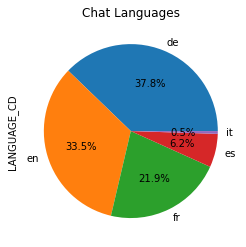

In [20]:
df_conv.LANGUAGE_CD.value_counts().plot(kind='pie', title="Chat Languages", autopct='%1.1f%%')

#### Chat Rating

<AxesSubplot:title={'center':'Chat Rating'}, ylabel='RATING_NUM'>

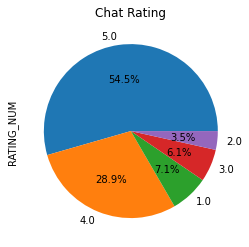

In [21]:
df_conv.RATING_NUM.value_counts().plot(kind='pie', title="Chat Rating", autopct='%1.1f%%')

#### Chat Initiator

<AxesSubplot:title={'center':'Chat Initiator'}, ylabel='INITIATOR_CD'>

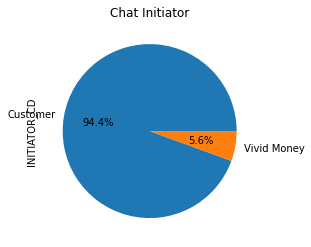

In [22]:
df_conv.INITIATOR_CD.value_counts().plot(kind='pie', title="Chat Initiator", autopct='%1.1f%%')

#### Timestamp of Chat Creation

In [23]:
df_created = pd.DataFrame(df_conv.CREATED_AT.value_counts())
df_created

<IPython.core.display.Javascript object>

,CREATED_AT
2021-01-04 15:46:41,4
2020-11-27 14:52:51,3
2021-01-29 00:05:13,3
2021-01-22 15:13:10,3
2021-01-28 10:03:51,3
...,...
2020-11-11 12:23:04,1
2020-11-27 10:46:05,1
2020-12-10 23:43:43,1
2021-01-12 20:55:57,1


#### Timestamp of chat closure

In [24]:
df_closed = pd.DataFrame(df_conv.CLOSED_AT.value_counts())
df_closed

<IPython.core.display.Javascript object>

,CLOSED_AT
2021-01-04 17:42:02,3
2020-12-29 09:27:50,3
2021-01-08 14:27:15,3
2020-12-28 09:40:00,3
2020-12-11 15:14:21,2
...,...
2021-01-21 17:30:35,1
2020-11-29 16:30:41,1
2020-12-19 15:21:24,1
2020-12-04 10:06:58,1


#### First Response Time

In [25]:
df_FRT = pd.DataFrame(df_conv.FRT_DU_IN_MIN.value_counts())
df_FRT

<IPython.core.display.Javascript object>

,FRT_DU_IN_MIN
1.100000,39
1.316667,37
1.633333,37
2.100000,37
0.950000,36
...,...
2497.450000,1
1185.716667,1
5615.316667,1
3890.816667,1


<h3 align="center">Observations from Conversations dataset</h3>

From above, there are 40315 rows and 9 columns in the df_conv, i.e. Conversations dataset, with some columns having missing values. These are the column variable definitions:
* **CONVERSATION_HK:** Key for each chat. There are 39535 unique conversation or chats keys, with ca. 98% solved within first contact & only ca. 2% required 2nd contact.There are no missing values.
* **CREATED_AT:** Timestamp of chat creation. First Chate date is 2020-11-01 00:44:03 and last is at 2021-01-31 23:51:57. We will later check if there are any days inbetween when no contact took place. No missing values.
* **STATUS_CD:** Current status of the chat, i.e. either closed, snoozed or open with ca. 99.97% of the chat closed. No missing values.
* **CLOSED_AT:** Timestamp of chat closure. Chats can be reopened within 5 days. 756 missing values.
* **RATING_NUM:** Customer rating of the interaction, with 25230 missing values, i.e ca. 63% of the contact was not rated or is missing, while of the ones rated, 80% was >=5.
* **LANGUAGE_CD:** 5 unique languages of the chat with the dominant being German (ca. 38%), followed by English (ca. 33%).There are 2 missing values.
* **FRT_DU_IN_MIN:** First response time of the chat in minutes. 6264 missing values. The minimum FRT is 0.18 and the max is 372641.10 with the later being problemtic if it's not an outlier.
* **INITIATOR_CD:** Whether the chat was initiated by a customer or our agents, with most chats ca. 94% initiated by the customer. There are no missing values.
* **CUSTOMER_HK:** Key for customers. There are 19717 unique customer keys with no missing values.

### Chat Volume Analysis

In [26]:
#create a copy of the original dataframe with only needed columns
df_cvt = df_conv.copy()
df_cvt = df_cvt[['CUSTOMER_HK','CREATED_AT', 'CLOSED_AT', 'STATUS_CD', 'RATING_NUM', 'LANGUAGE_CD', 'INITIATOR_CD', 'FRT_DU_IN_MIN']]
df_cvt.head(2)

,CUSTOMER_HK,CREATED_AT,CLOSED_AT,STATUS_CD,RATING_NUM,LANGUAGE_CD,INITIATOR_CD,FRT_DU_IN_MIN
0,04c604e678b18d7ca10b85fb8d3672a03b7b6b71e78dd5...,2020-11-16 17:18:40,2020-11-16 18:41:31,closed,NaN,de,Customer,82.816667
1,a42a9fdf0ee31d331c9d96ce6fbf30f307b52ff40a55ec...,2020-12-08 09:13:49,2020-12-13 09:04:20,closed,NaN,de,Customer,5759.333333


In [27]:
#convert to datetime format 
df_cvt['CREATED_AT'] = pd.to_datetime(df_cvt['CREATED_AT'].astype(str), format='%Y-%m-%d %H:%M:%S')
df_cvt['year'] = df_cvt['CREATED_AT'].apply(lambda x: x.year)
df_cvt['date'] = df_cvt['CREATED_AT'].dt.date
df_cvt['year'] = df_cvt['CREATED_AT'].dt.year
#df_cvt['Month'] = df_cvt['CREATED_AT'].dt.month
df_cvt['Month'] = df_cvt['CREATED_AT'].dt.month_name()
df_cvt['Year_Month'] = df_cvt['CREATED_AT'].dt.strftime('%Y-%m')
#df_cvt['Day'] = df_cvt['CREATED_AT'].dt.day
df_cvt['Day'] = df_cvt['CREATED_AT'].dt.day_name()
df_cvt['Hour'] = df_cvt['CREATED_AT'].dt.hour
df_cvt.set_index('date', inplace=True)

<IPython.core.display.Javascript object>

In [28]:
#find missing dates data
pd.date_range(start = '2020-11-01', end = '2021-01-31' ).difference(df_cvt.index)  

<IPython.core.display.Javascript object>

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

There were no days where there wasn't contact

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

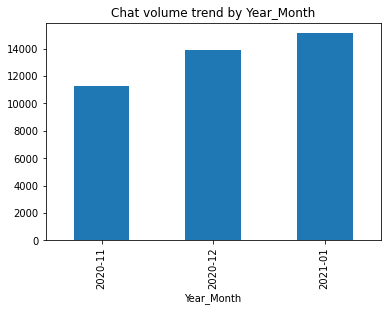

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

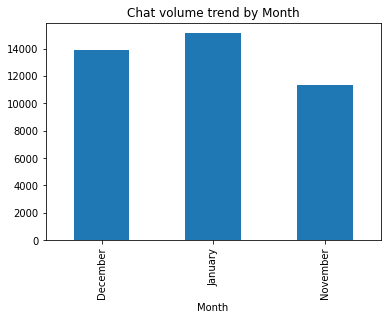

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

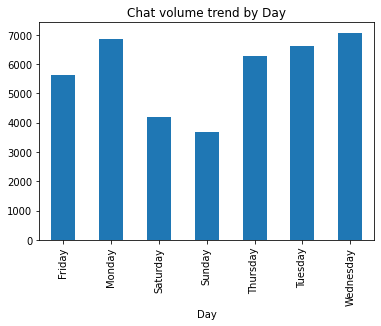

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

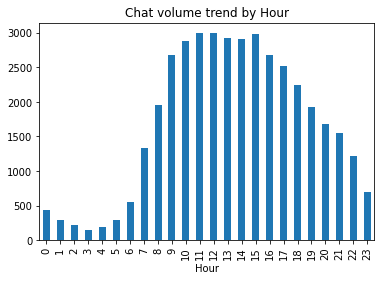

In [29]:
x_axis = ['Year_Month','Month','Day','Hour']
y_axis = ['CUSTOMER_HK']
for a in x_axis:
    for b in y_axis:
        _ = df_cvt.groupby([a]).count()[b].plot.bar()
        plt.title('Chat volume trend by ' + a)
#       plt.savefig('../Images/Barplot of 'Chat Volume w.r.t '+str(a)+'.png')
        plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Total Customers')

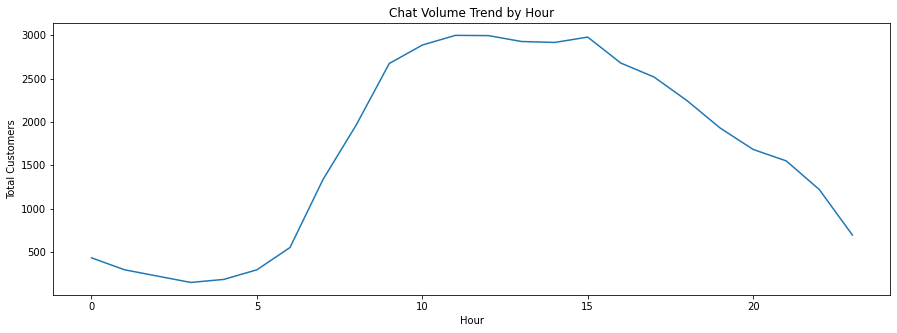

In [30]:
fig, ax = plt.subplots(figsize=(15,5))
df_cvt.groupby(['Hour']).count()['CUSTOMER_HK'].plot(ax=ax)
plt.title("Chat Volume Trend by Hour")
plt.ylabel('Total Customers')

In [31]:
def plot(data,feature):
    data = df_cvt.groupby([feature])['CUSTOMER_HK'].count().reset_index()
    plot_data = [
    go.Bar(
        x=data[feature],
        y=data['CUSTOMER_HK'],
    )]

    plot_layout = go.Layout(
        xaxis={"type": "category"},
        title=str('Chat Volume Trend By ') + feature )
        
    fig = go.Figure(data=plot_data, layout=plot_layout)
    pyoff.iplot(fig)

In [32]:
plot(data, 'Year_Month')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
plot(data,'Month')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
months = ['November', 'December', 'January']
total_customers = [13886,15128,11301]
trace = go.Pie(labels = months, values = total_customers)
data = [trace]
fig = go.Figure(data = data)
iplot(fig)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
plot(data,'Day')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
plot(data,'Hour')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Chat Volume Trend w.r.t Chat Rating, Language & Initiator

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

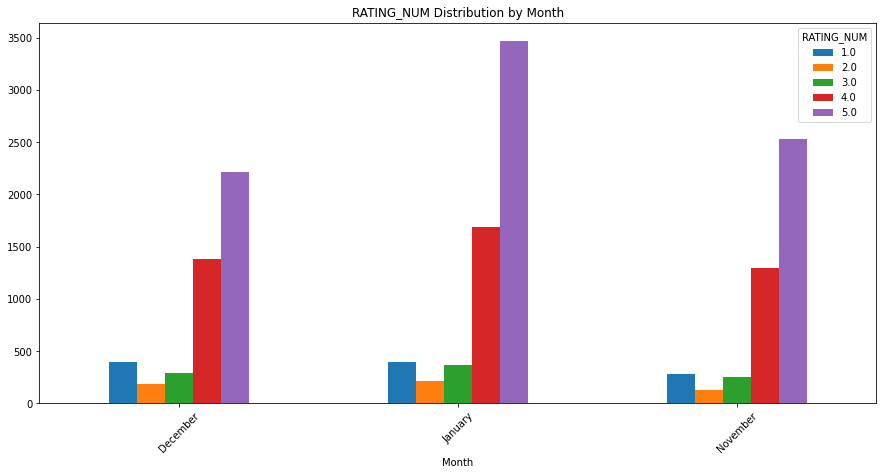

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

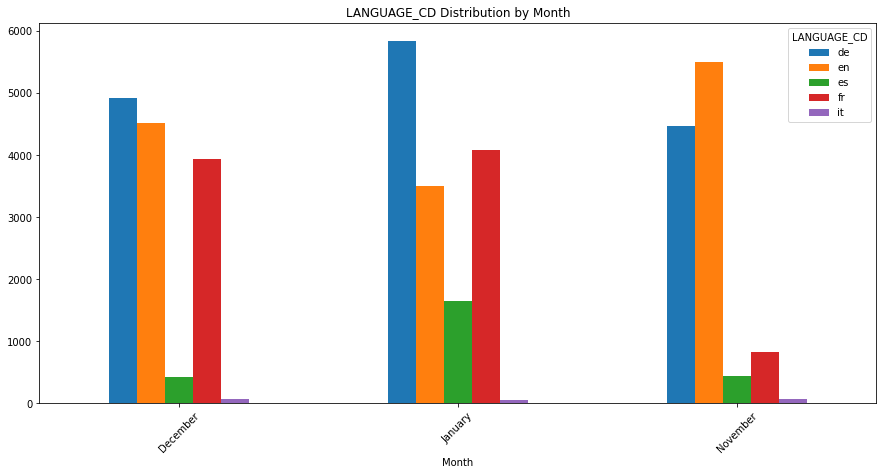

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

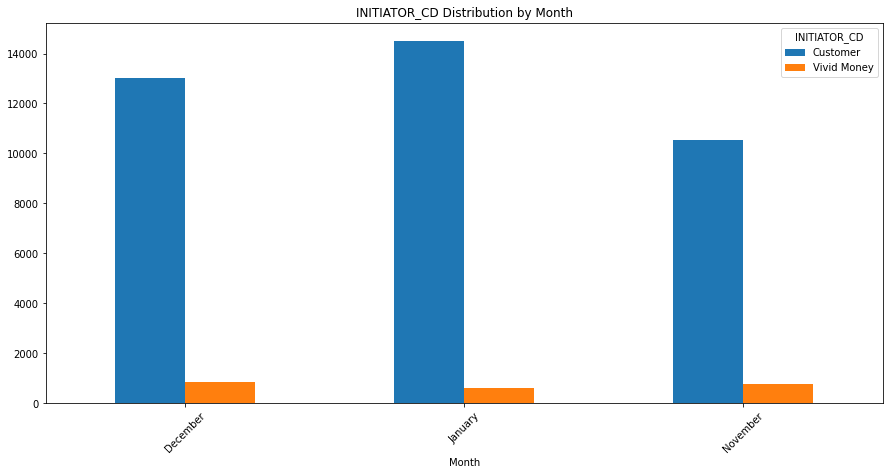

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

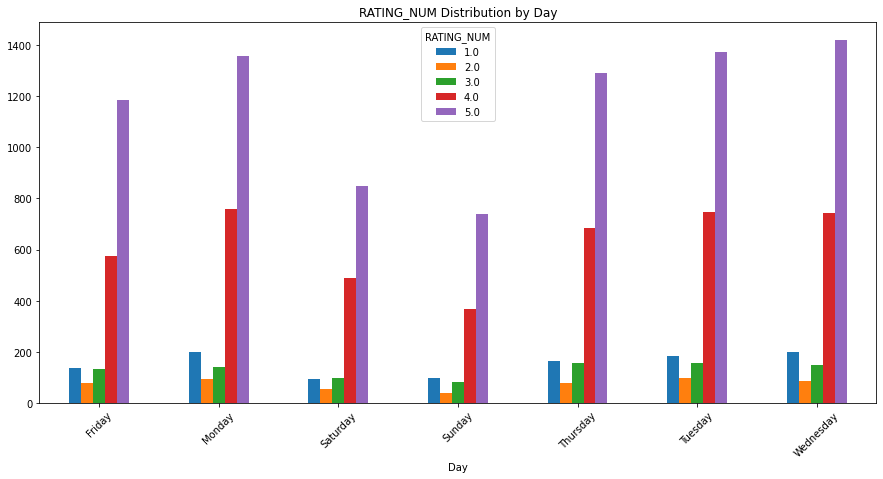

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

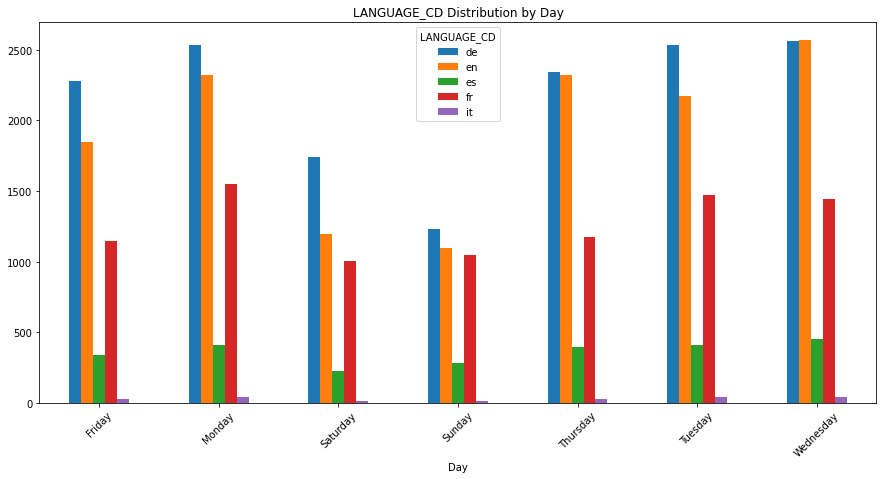

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

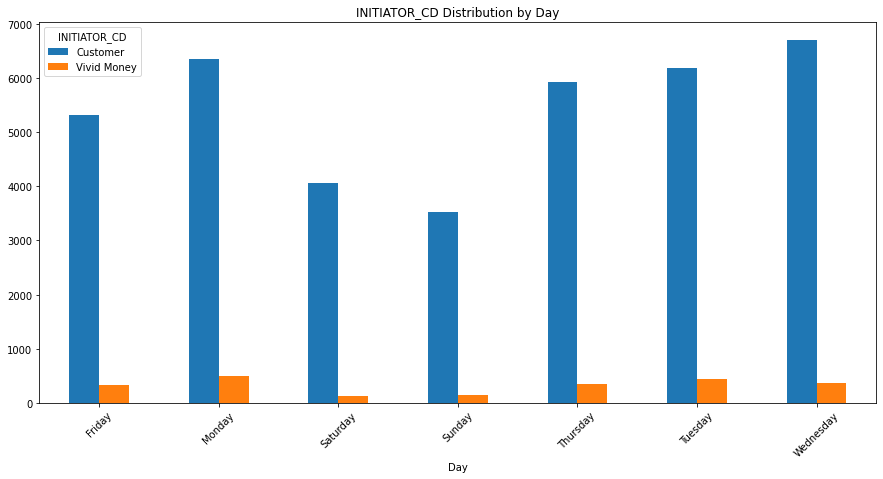

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

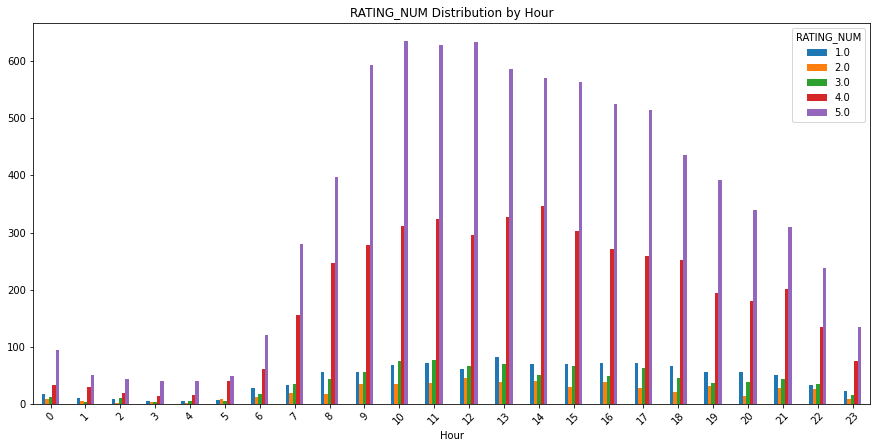

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

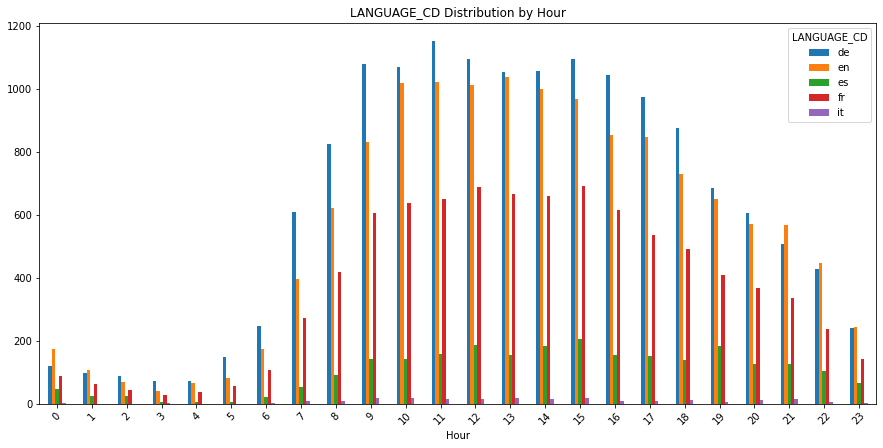

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

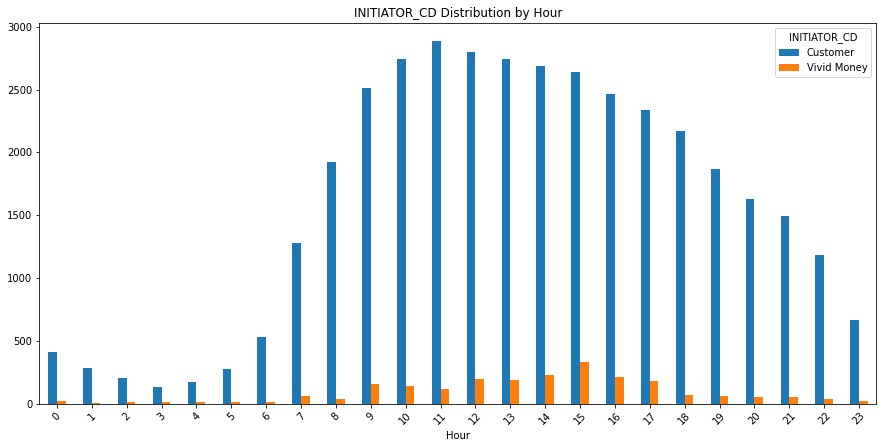

In [37]:
x1_axis = ['Month','Day','Hour']
x2_axis = ['RATING_NUM','LANGUAGE_CD','INITIATOR_CD']
y_axis = ['CUSTOMER_HK']
for a in x1_axis:
    for b in x2_axis:
        for c in y_axis:
            fig, ax = plt.subplots(figsize=(15,7))
            _ = df_cvt.groupby([a,b]).count()[c].unstack().plot.bar(ax=ax)
            plt.title(b + ' Distribution ' + 'by ' + a)
            plt.xticks(rotation=45, horizontalalignment="center")
            plt.show()

### First Response Time
This is the first and most important contact center KPI, as it is the first (and most important) impression you will give when clients contact your customer service. First Response Time (FRT) is the time elapsed between a customer raising a ticket and an agent first responding to it. We are going to use the average FRT in order to see **trend over time**. The average FRT is good because it looks at not just the one-off response for a single customer, but the average response time for your entire department.It can also be a good idea to calculate your FRT based on the median instead of the average to avoid outliers skewing the data.

In [38]:
#FRT Statistics

df_cvt['FRT_DU_IN_MIN'].describe(include = 'All')

count     34051.000000
mean        838.680738
std        3640.505013
min           0.183333
25%           9.333333
50%          59.783333
75%         773.616667
max      372641.100000
Name: FRT_DU_IN_MIN, dtype: float64

In [39]:
df_frt = df_cvt.copy()
def plot(data,x_axis,y_axis):
    data = df_frt.groupby([x_axis])[y_axis].mean().reset_index()
    plot_data = [
    go.Bar(
        x=data[x_axis],
        y=data[y_axis],
    )]

    plot_layout = go.Layout(
        xaxis={"type": "category"},
        title=str('Average First Response Time By ') + x_axis)
        
    fig = go.Figure(data=plot_data, layout=plot_layout)
    pyoff.iplot(fig)

In [40]:
plot(data, 'Month', 'FRT_DU_IN_MIN')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
plot(data, 'Day', 'FRT_DU_IN_MIN')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
plot(data, 'Hour', 'FRT_DU_IN_MIN')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Avg FRT VS. CHAT VOLUME METRIC

In [43]:
def plot(feature):
    fig = make_subplots(1,2)

    data1 = df_cvt.groupby([feature])['CUSTOMER_HK'].count().reset_index()
    data2 = df_frt.groupby([feature])['FRT_DU_IN_MIN'].mean().reset_index()

    fig.add_trace(go.Bar
    (name='Chat Volume', x=data1[feature], y=data1['CUSTOMER_HK']))

    fig.add_trace(go.Scatter
    (name='AVG FRT', x=data1[feature],
    y=data2['FRT_DU_IN_MIN']))
    
    fig.update_xaxes(title_text=str(feature))
    fig.update_layout(autosize=False, width=1200,height=500, 
    title=feature + str('ly Chat Avg FRT VS. Chat Volume'))

    fig.show()

In [44]:
plot('Month')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
print('Daily Chat Avg FRT VS. Chat Volume')
plot('Day')

Daily Chat Avg FRT VS. Chat Volume


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
plot('Hour')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Average FRT Trend w.r.t Chat Rating, Language & Initiator

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

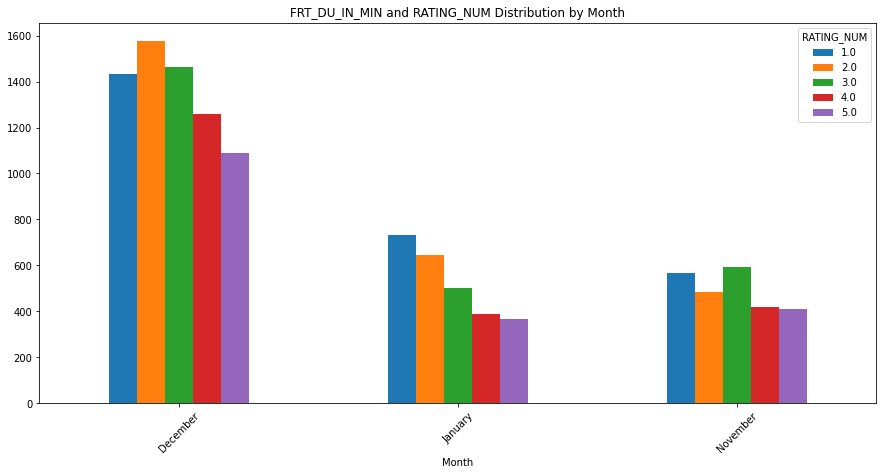

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

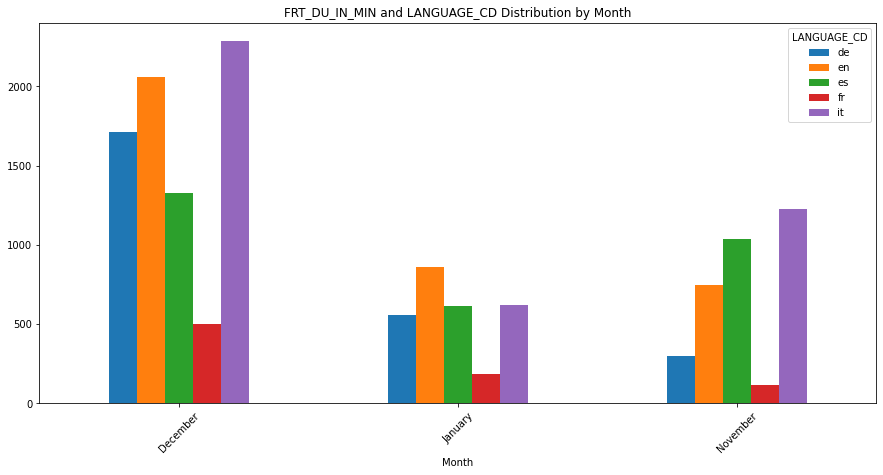

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

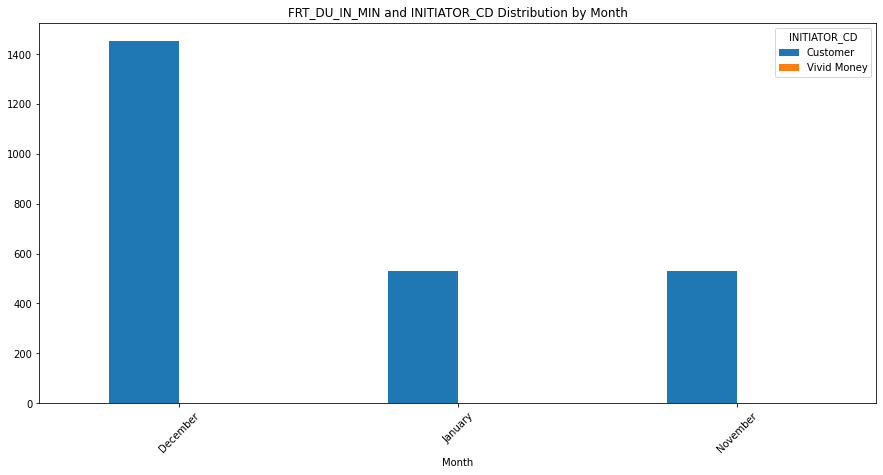

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

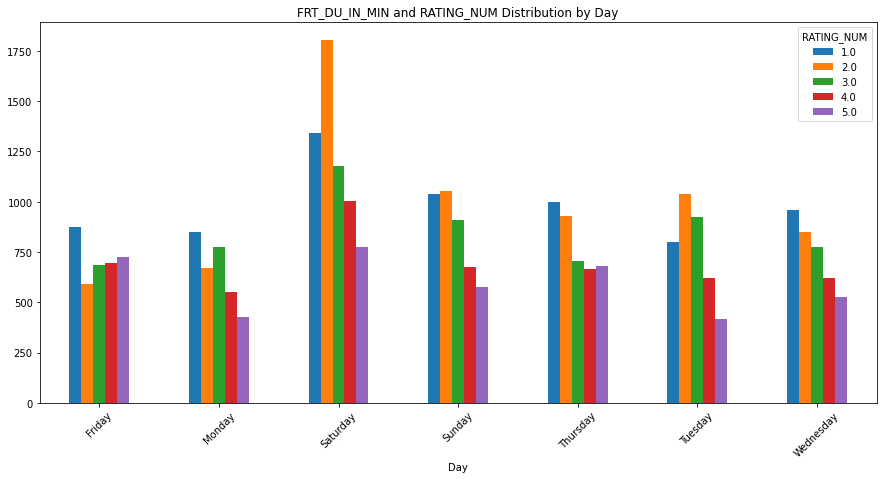

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

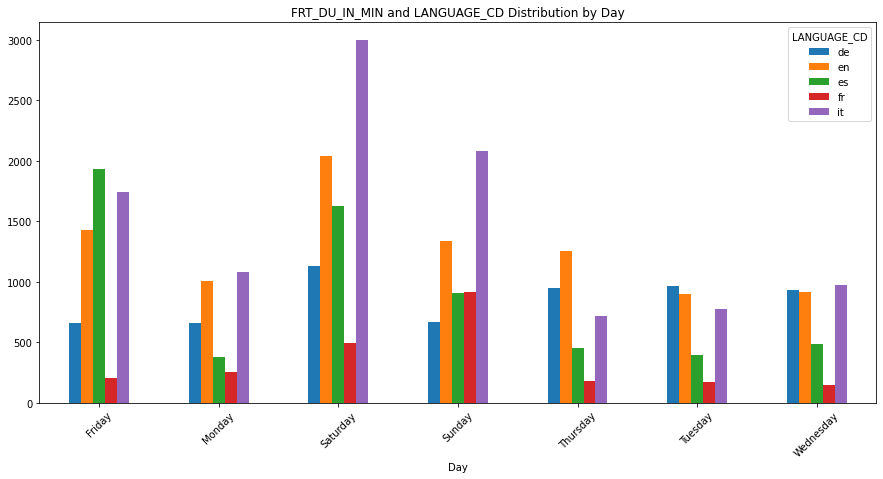

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

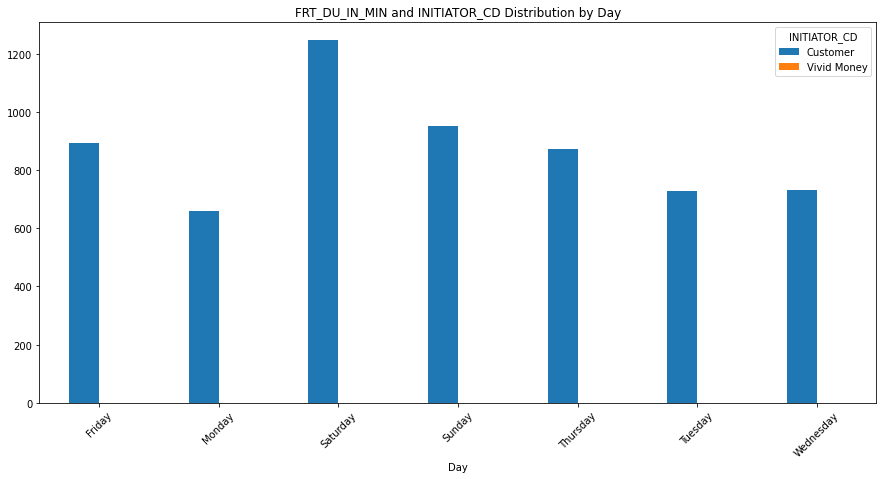

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

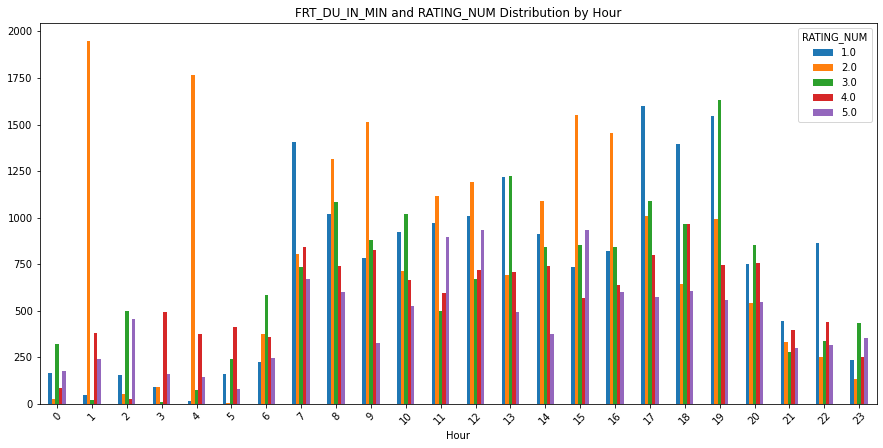

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

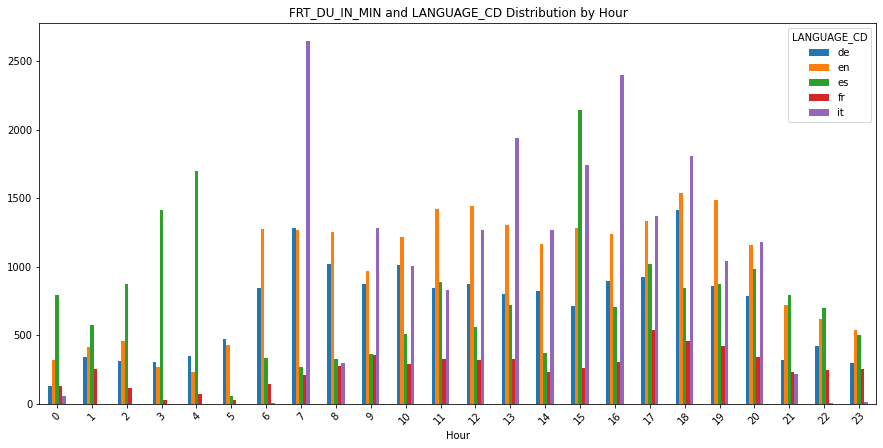

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

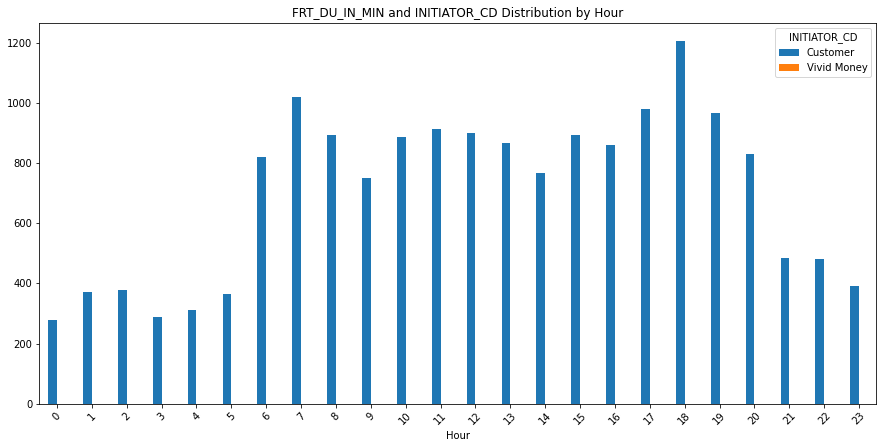

In [47]:
x1_axis = ['Month','Day','Hour']
x2_axis = ['RATING_NUM','LANGUAGE_CD','INITIATOR_CD']
y_axis = ['FRT_DU_IN_MIN']
for a in x1_axis:
    for b in x2_axis:
        for c in y_axis:
            fig, ax = plt.subplots(figsize=(15,7))
            _ = df_cvt.groupby([a,b]).mean()[c].unstack().plot.bar(ax=ax)
            plt.title(c + ' and '+ b + ' Distribution by ' + a )
            plt.xticks(rotation=45, horizontalalignment="center")
            plt.savefig('Images/Barplot of ' + str(c) + ' and ' + str(b) +' Distribution by '+ str(a)+'.png')
            plt.show()

### Chat Handle Time (CHT)
This KPI essentially asks how long on average the chats take. It is the average amount of time it takes to complete each call. It includes hold time, talk time, and after-call work time.

In [48]:
#make copy of original dataframe
df_cht = df_cvt.copy()

#drop all rows with missing values in the CLOSED_AT column which is only ca. 1.9% of total data
df_cht.dropna(subset=['CLOSED_AT'], inplace=True)

In [49]:
# Create new column with calculated Chat Handle Time (CHT) in minutes
df_cht['CHT_MIN'] = df_cht['CLOSED_AT'] - df_cht['CREATED_AT']
df_cht['CHT_MIN']=df_cht['CHT_MIN']/np.timedelta64(1,'m')

<IPython.core.display.Javascript object>

In [50]:
df_cht

,CUSTOMER_HK,CREATED_AT,CLOSED_AT,STATUS_CD,RATING_NUM,LANGUAGE_CD,INITIATOR_CD,FRT_DU_IN_MIN,year,Month,Year_Month,Day,Hour,CHT_MIN
date,,,,,,,,,,,,,,
2020-11-16,04c604e678b18d7ca10b85fb8d3672a03b7b6b71e78dd5...,2020-11-16 17:18:40,2020-11-16 18:41:31,closed,NaN,de,Customer,82.816667,2020,November,2020-11,Monday,17,82.850000
2020-12-08,a42a9fdf0ee31d331c9d96ce6fbf30f307b52ff40a55ec...,2020-12-08 09:13:49,2020-12-13 09:04:20,closed,NaN,de,Customer,5759.333333,2020,December,2020-12,Tuesday,9,7190.516667
2020-12-28,be92b2698f17aa7fab796fd5eb132cc251fce6fe1870dc...,2020-12-28 14:09:31,2020-12-28 15:58:05,closed,NaN,fr,Customer,35.666667,2020,December,2020-12,Monday,14,108.566667
2021-01-08,c84455bb3bbc2dbf16a1edd9c44e76baaf06b0ee224ed5...,2021-01-08 08:49:28,2021-01-13 08:09:37,closed,NaN,de,Customer,653.800000,2021,January,2021-01,Friday,8,7160.150000
2020-12-03,7df3aa4e5f29e4f5946d652d4f6d6f88d3f850ac9ba33a...,2020-12-03 22:15:15,2020-12-05 01:58:26,closed,NaN,en,Customer,843.033333,2020,December,2020-12,Thursday,22,1663.183333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-12,d0c5852da05dd8caa02f4c276659abcdf4da5a285ed363...,2021-01-12 07:49:58,2021-01-13 14:38:42,closed,4.0,en,Customer,1848.300000,2021,January,2021-01,Tuesday,7,1848.733333
2021-01-04,4c65aeb4e3c56d9ad692a2dd53f6e58d3b1c03f53ebee8...,2021-01-04 15:56:03,2021-01-04 20:17:36,closed,NaN,en,Customer,260.566667,2021,January,2021-01,Monday,15,261.550000
2020-12-23,b3c4de44a98d55acc296d54636f321323e55bc793f0c01...,2020-12-23 13:32:14,2020-12-23 15:19:54,closed,4.0,fr,Customer,27.033333,2020,December,2020-12,Wednesday,13,107.666667


count     39559.000000
mean       7035.573023
std       23926.066898
min           0.016667
25%          64.683333
50%         595.783333
75%        4106.616667
max      459373.666667
Name: CHT_MIN, dtype: float64

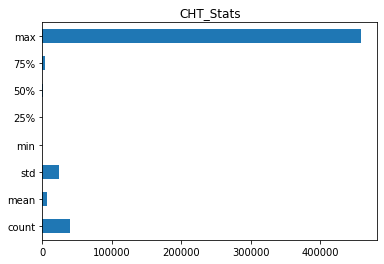

In [51]:
df_cht['CHT_MIN'].describe(include = 'All').plot(kind='barh', title='CHT_Stats')
df_cht['CHT_MIN'].describe(include = 'All')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

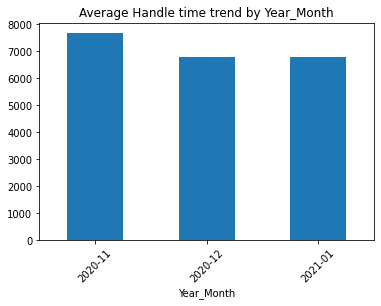

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

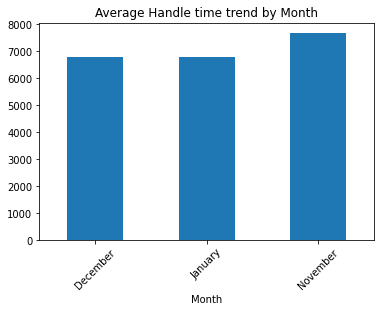

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

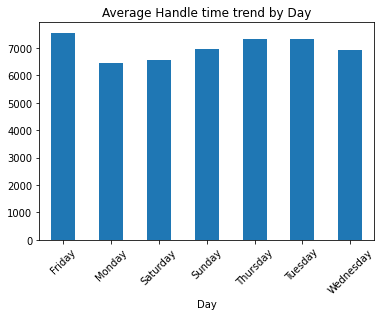

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

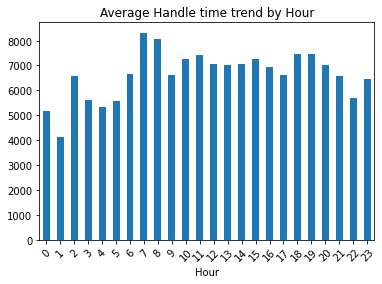

In [52]:
x_axis = ['Year_Month','Month','Day','Hour']
y_axis = ['CHT_MIN']
for a in x_axis:
    for b in y_axis:
        _ = df_cht.groupby([a]).mean()[b].plot.bar()
        plt.title('Average Handle time trend by ' + a)
        plt.xticks(rotation=45, horizontalalignment="center")
        plt.show()

#### Average Handling Time Trend w.r.t Chat Rating, Language & Initiator

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

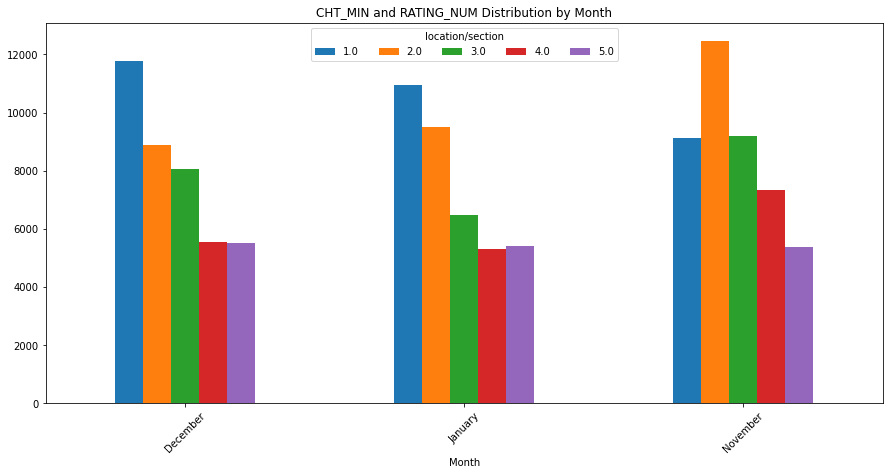

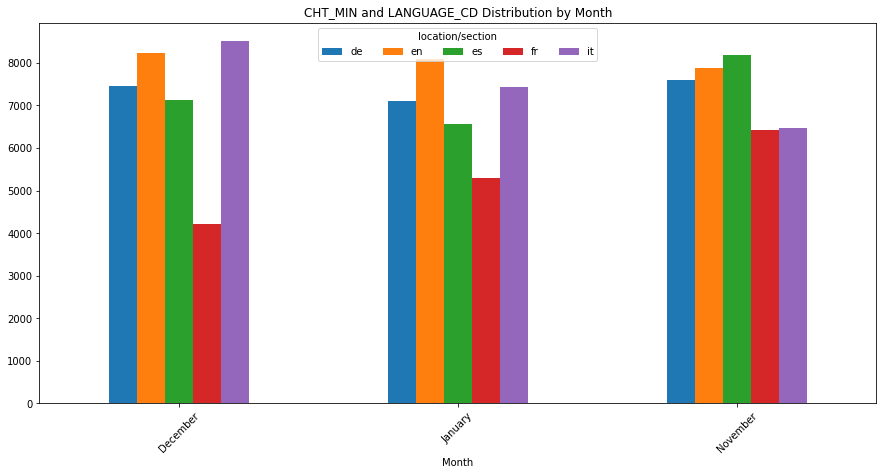

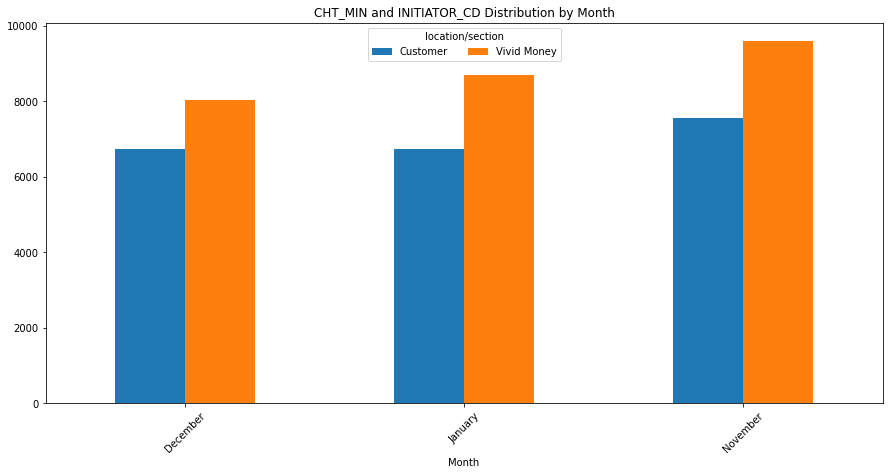

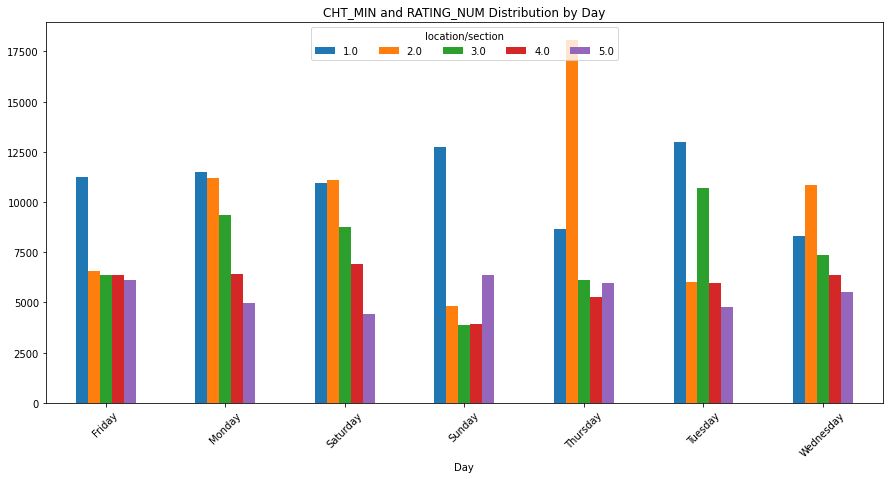

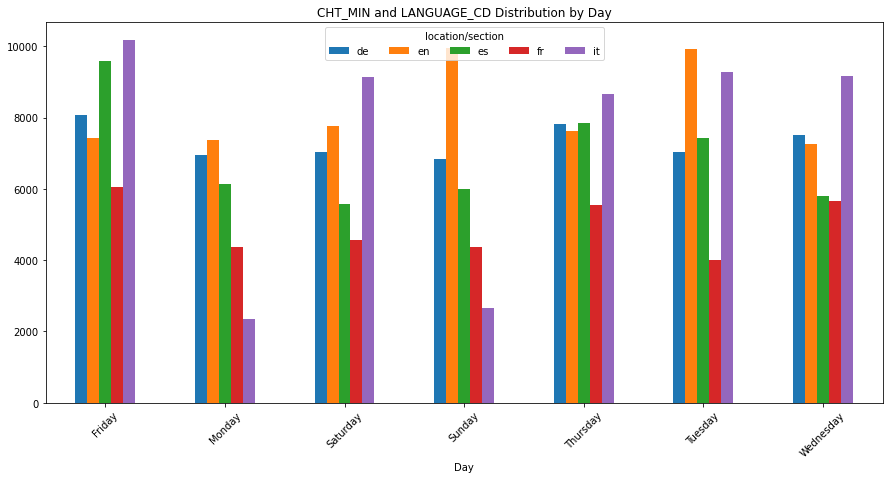

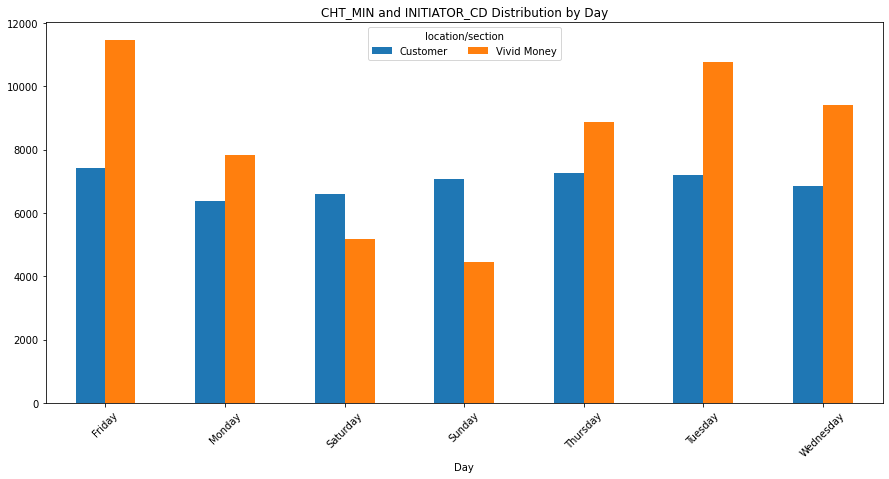

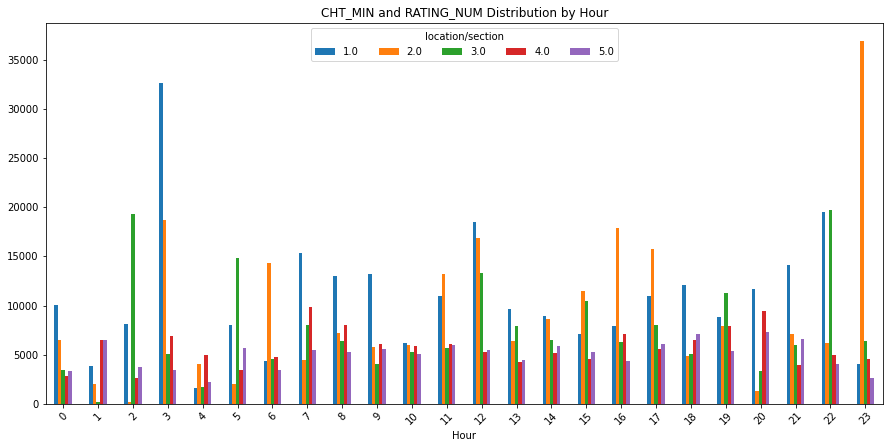

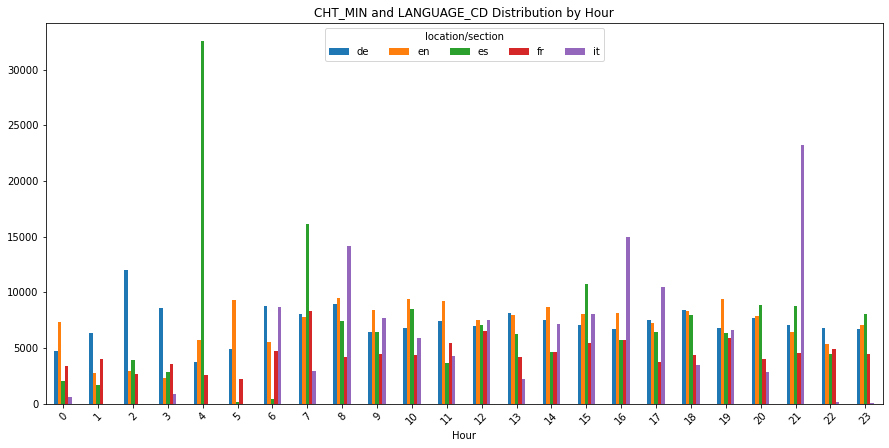

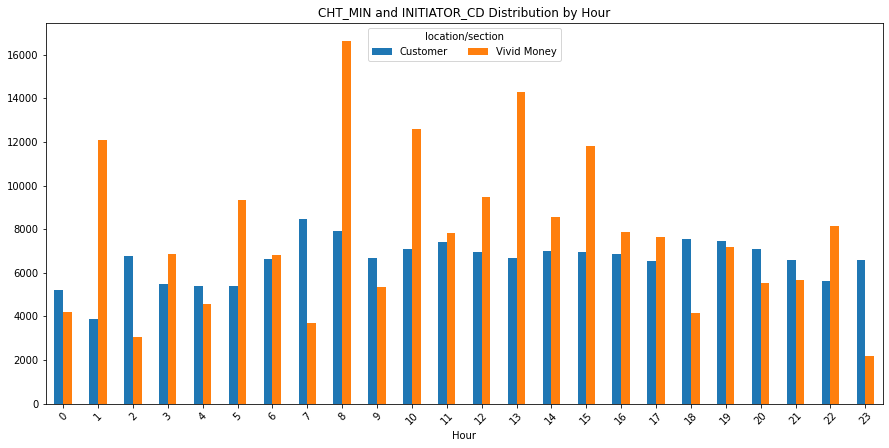

In [53]:
x1_axis = ['Month','Day','Hour']
x2_axis = ['RATING_NUM','LANGUAGE_CD','INITIATOR_CD']
y_axis = ['CHT_MIN']
for a in x1_axis:
    for b in x2_axis:
        for c in y_axis:
            fig, ax = plt.subplots(figsize=(15,7))
            _ = df_cht.groupby([a,b]).mean()[c].unstack().plot(kind='bar', ax=ax).legend(loc='upper center', ncol=5)
            plt.title(c + ' and '+ b + ' Distribution by ' + a )
            plt.xticks(rotation=45, horizontalalignment="center")
            plt.savefig('Images/Barplot of ' + str(c) + ' and ' + str(b) +' Distribution by '+ str(a) + '.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

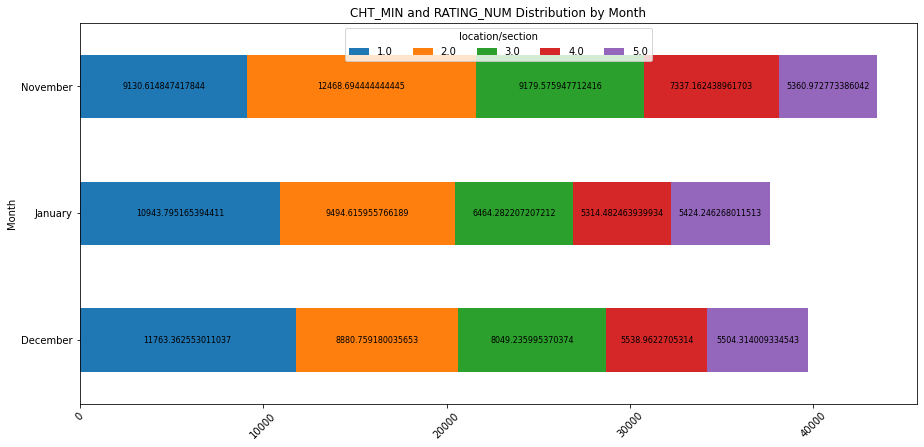

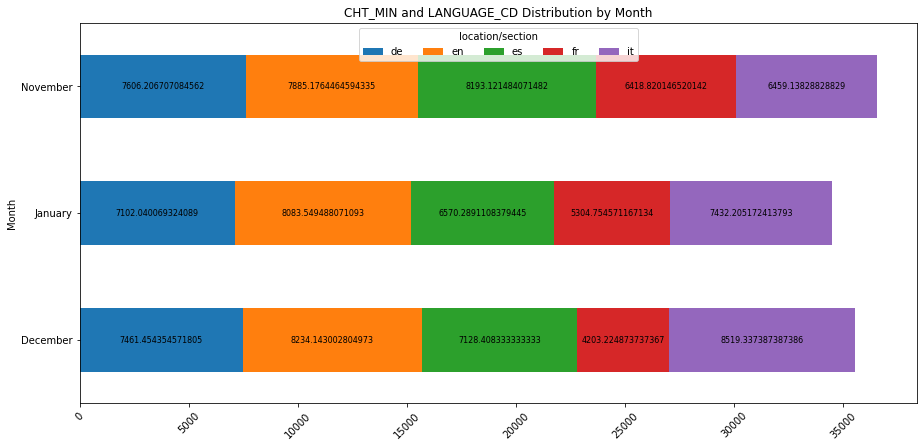

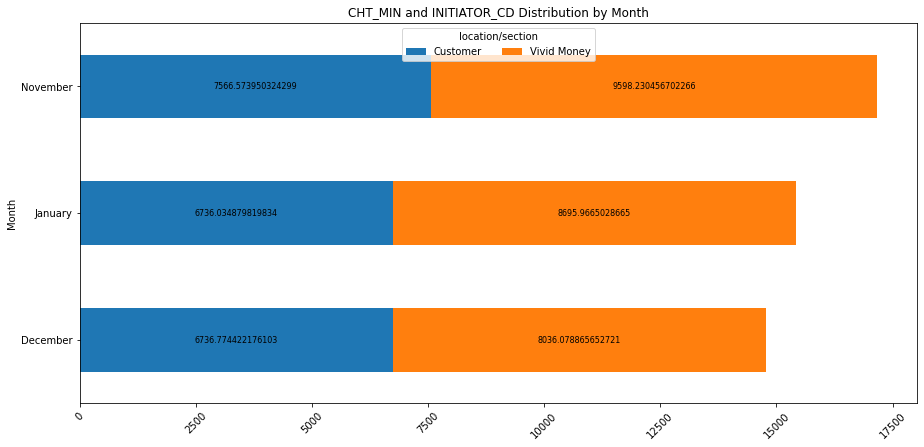

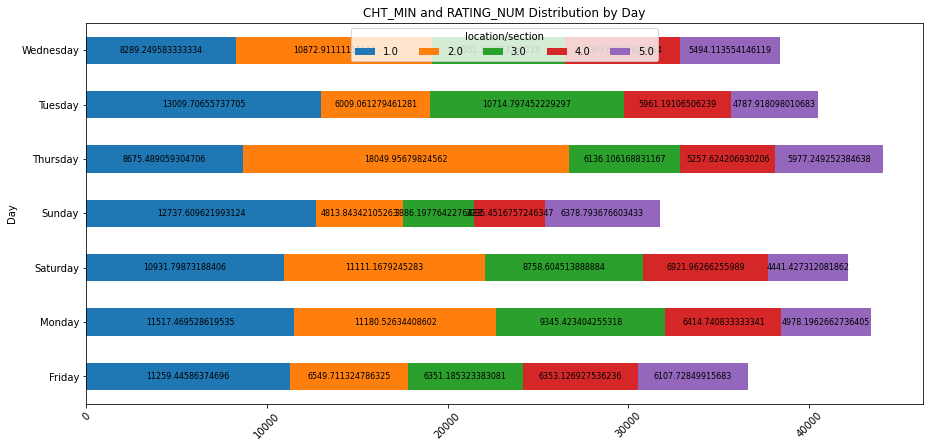

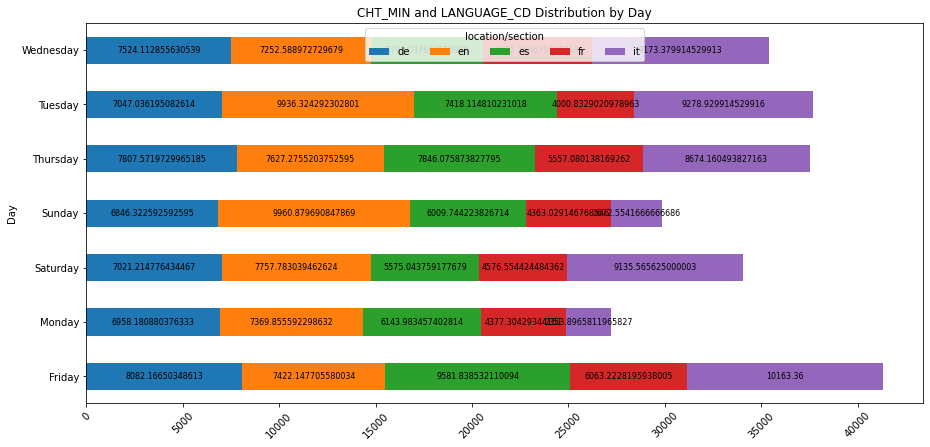

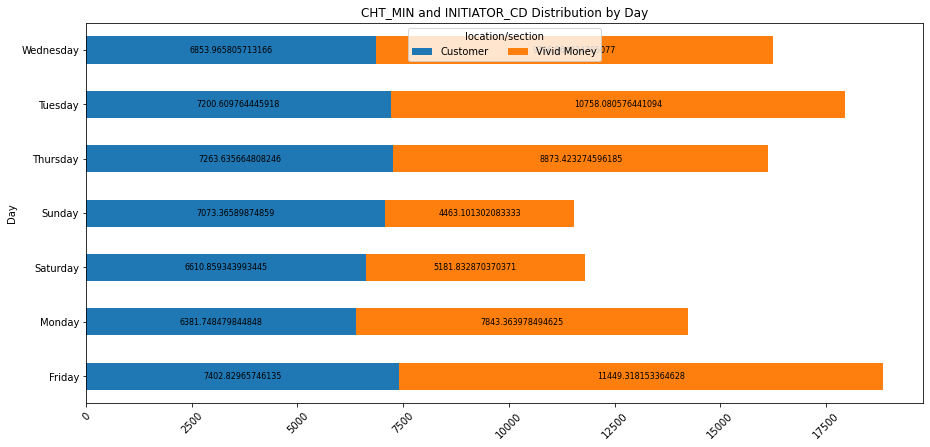

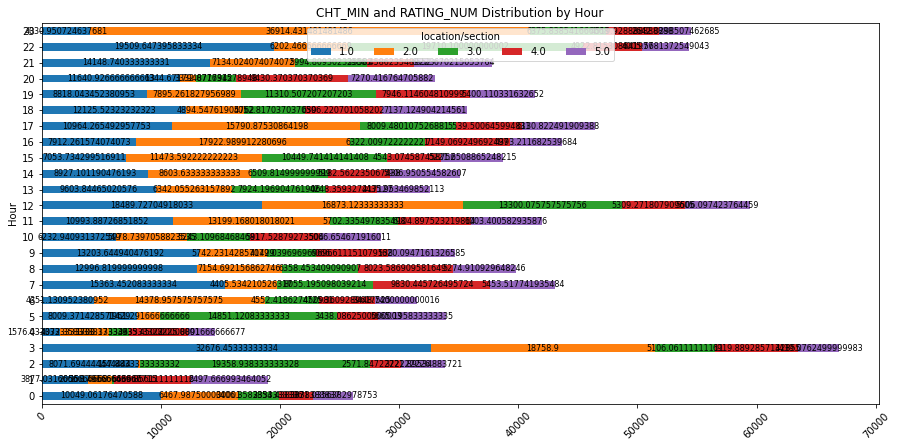

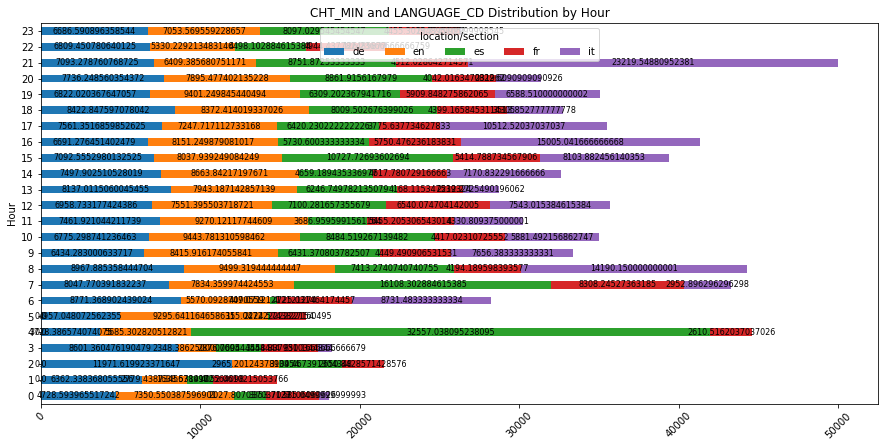

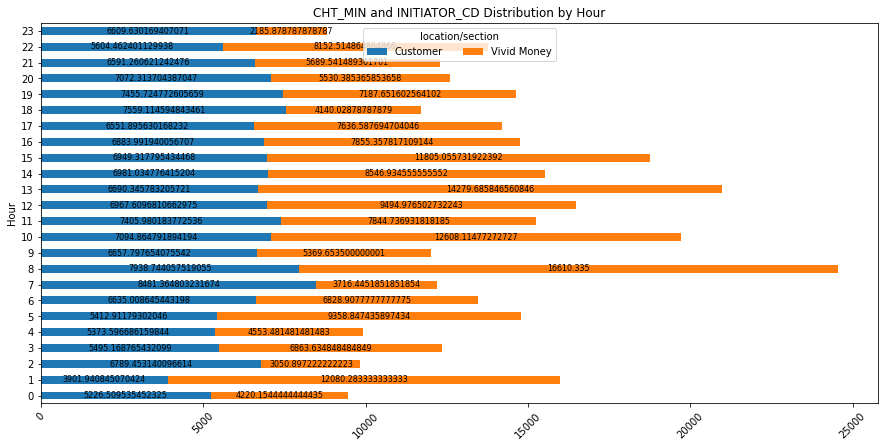

In [54]:
x1_axis = ['Month','Day','Hour']
x2_axis = ['RATING_NUM','LANGUAGE_CD','INITIATOR_CD']
y_axis = ['CHT_MIN']
for a in x1_axis:
    for b in x2_axis:
        for c in y_axis:
            fig, ax = plt.subplots(figsize=(15,7))
            _ = df_cht.groupby([a,b]).mean()[c].unstack().plot(kind='barh', stacked=True, ax=ax).legend(loc='upper center', ncol=5, title='location/section')
            plt.title(c + ' and '+ b + ' Distribution by ' + a )
            plt.xticks(rotation=45, horizontalalignment="center")
            
            for i in ax.patches:
                # Find where everything is located
                height = i.get_height()
                width = i.get_width()
                x = i.get_x()
                y = i.get_y()

                # The width of the bar is the data value and can used as the label
                #label_text = height  # f'{height:.2f}' if you have decimal values as labels
                label_text = width # Use label_text = width if horizontal bars 

                label_x = x + width / 2
                label_y = y + height / 2
                ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

### Other metrics to be considered 

#### Chat Resolution Time (CRT)
This is the time it takes to resolve a problem, so in this case it will still be the difference between the last closed_at date and first created_at data grouped by the conversation_id for all closed cases.

#### First-time chat resolution rate
First-time chat resolution rate is how often your customer’s inquiry is resolved during their first interaction with your contact center. Higher first-time chat resolution rates indicate greater customer satisfaction.